# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [25]:
import pandas as pd
import numpy as np

#importing the features
features=list()
with open('UCI HAR Dataset/features.txt') as f:
    features=[line.split()[1] for line in f.readlines()]
features = list(set(features))
print('the no of features is:{}'.format(len(features)))

the no of features is:477


# obtain the data

In [45]:
train=pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')

In [46]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [47]:
train.shape

(7352, 564)

In [48]:
test=pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')

In [49]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [74]:
print('No. of duplicates in train:{}'.format(sum(train.duplicated())))
print('No. of duplicayte in test:{}'.format(sum(test.duplicated())))

No. of duplicates in train:0
No. of duplicayte in test:0


## 2. Checking for NaN/null values

In [80]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

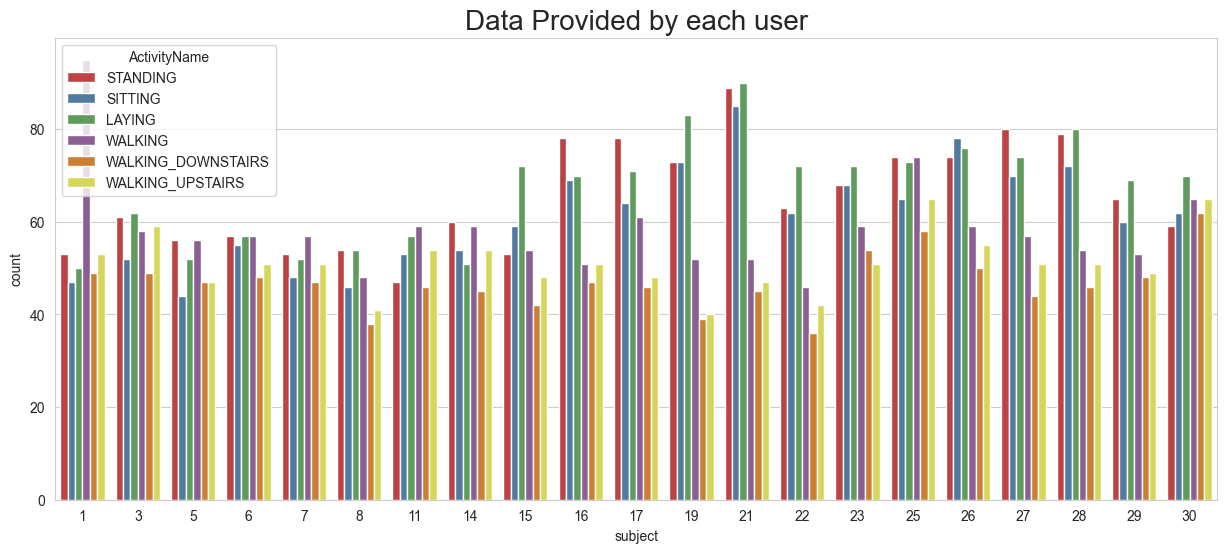

In [92]:
plt.figure(figsize=(15,6))
plt.title('Data Provided by each user',fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data=train)
plt.show()

> We have got almost same number of reading from all the subjects

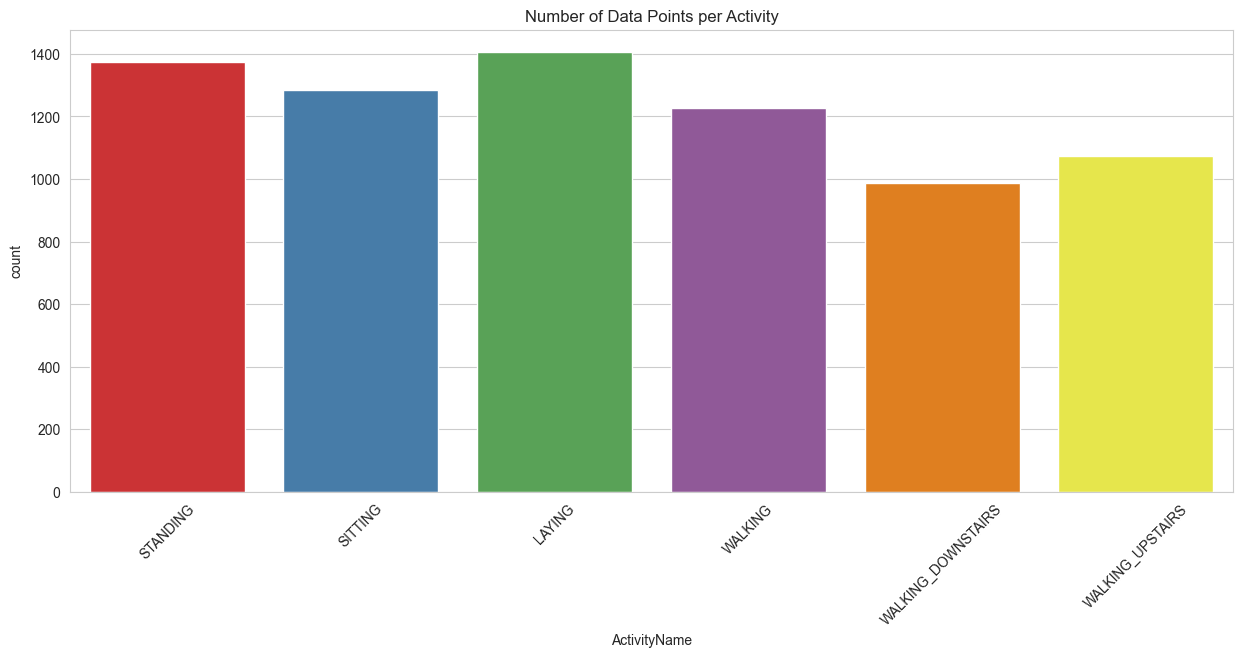

In [100]:
plt.figure(figsize=(15,6))
plt.title("Number of Data Points per Activity")
sns.countplot(x='ActivityName',data=train, palette= 'Set1')
plt.xticks(rotation=45)
plt.show()

## Observation
Our data is well balanced (almost)

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge 


+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

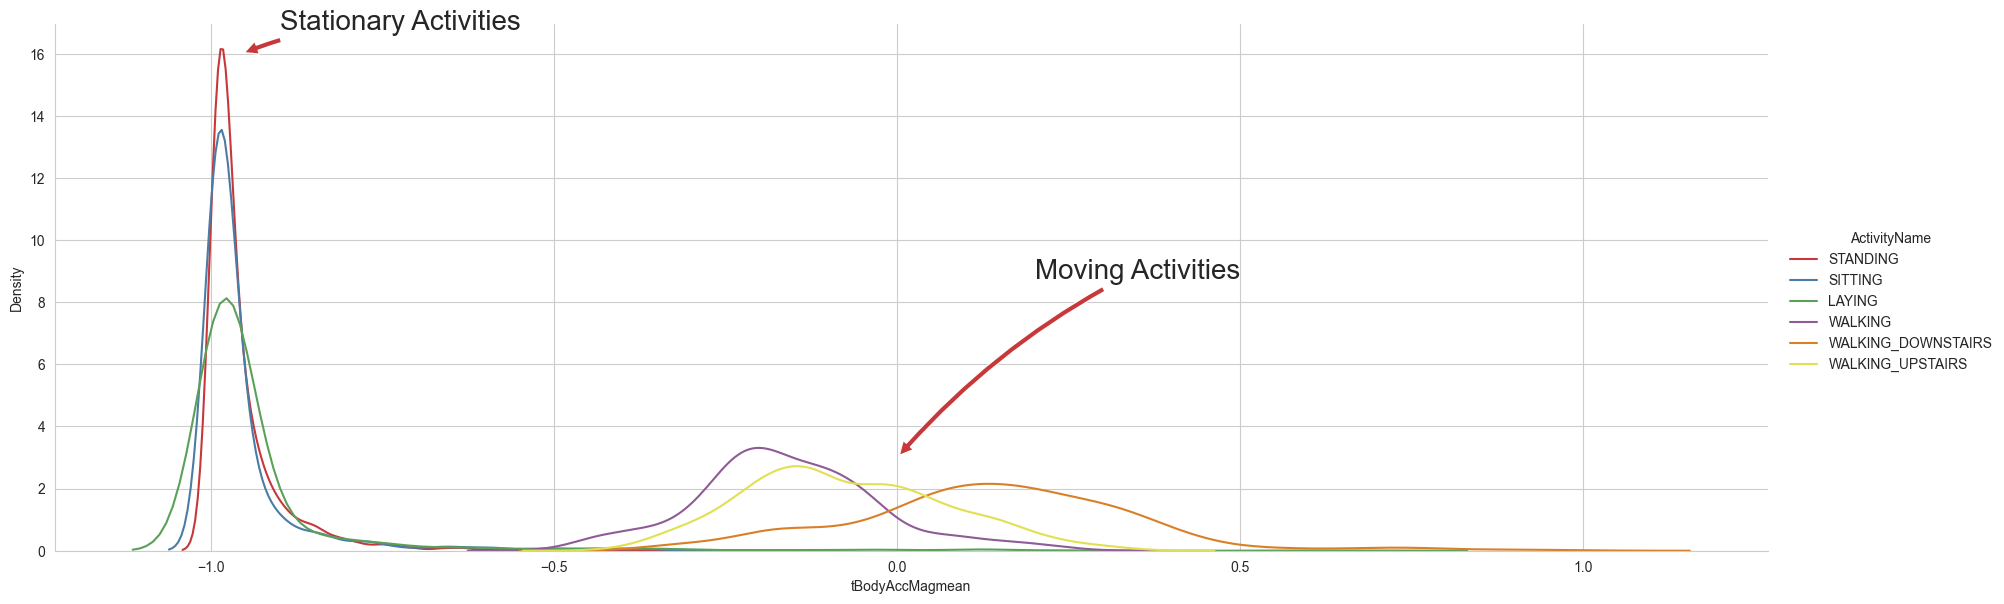

In [122]:
sns.set_palette('Set1', desat=0.7 )
facetgrid=sns.FacetGrid(train,hue='ActivityName', height=6,aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMagmean',hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,16), xytext=(-0.9, 17), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()



/var/folders/9m/ym00bgy56k30mwwl389_76km0000gn/T/ipykernel_2261/2029461801.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False,label='Sitting')
/var/folders/9m/ym00bgy56k30mwwl389_76km0000gn/T/ipykernel_2261/2029461801.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

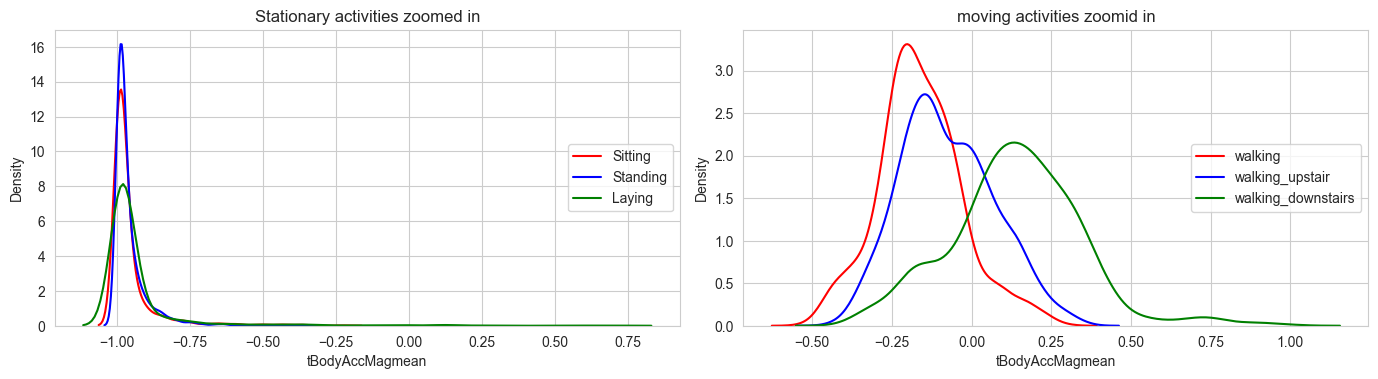

In [128]:
df1 = train[train['Activity'] == 1]
df2 = train[train['Activity'] == 2]
df3 = train[train['Activity'] == 3]
df4 = train[train['Activity'] == 4]
df5 = train[train['Activity'] == 5]
df6 = train[train['Activity'] == 6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title("Stationary activities zoomed in")
sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False,label='Sitting')
sns.distplot(df5['tBodyAccMagmean'],color='b',hist=False,label='Standing')
sns.distplot(df6['tBodyAccMagmean'],color='g',hist=False,label='Laying')
plt.legend(loc='right')

plt.subplot(2,2,2)
plt.title("moving activities zoomid in")
sns.distplot(df1['tBodyAccMagmean'],color='r',hist=False,label='walking')
sns.distplot(df2['tBodyAccMagmean'],color='b',hist=False,label='walking_upstair')
sns.distplot(df3['tBodyAccMagmean'],color='g',hist=False,label='walking_downstairs')
plt.legend(loc='right')

plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

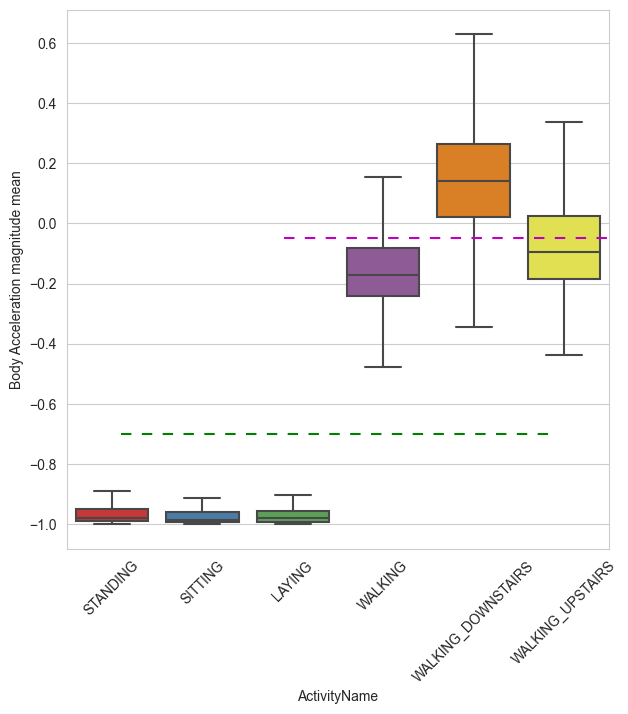

In [132]:
plt.figure(figsize=(7,7))
sns.boxplot(x="ActivityName",y='tBodyAccMagmean', data=train, showfliers=False, saturation=1)
plt.ylabel('Body Acceleration magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=45)
plt.show()

__Observations__ :
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

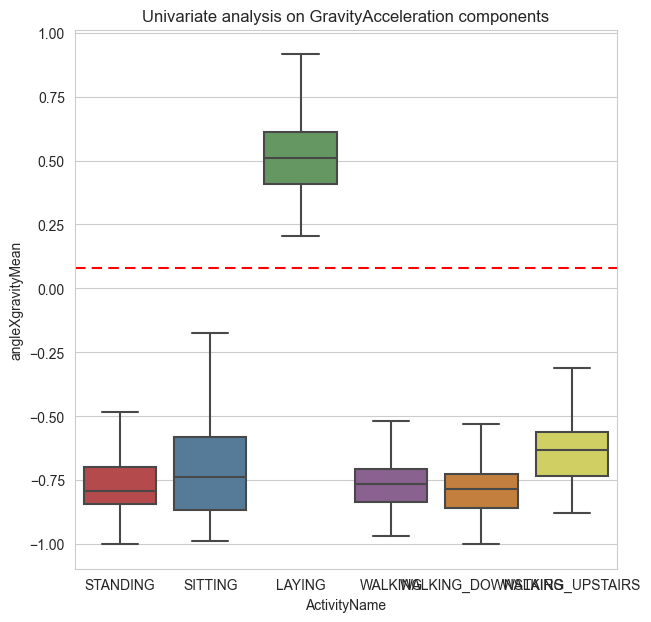

In [140]:
plt.figure(figsize=(7,7))
plt.title('Analysis on angleXgravityMean')
sns.boxplot(x='ActivityName',y='angleXgravityMean',data=train, showfliers=False)
plt.axhline(y=0.08,c='r',dashes=(5,3))
plt.show()

__Observations__:
* If angleXgravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

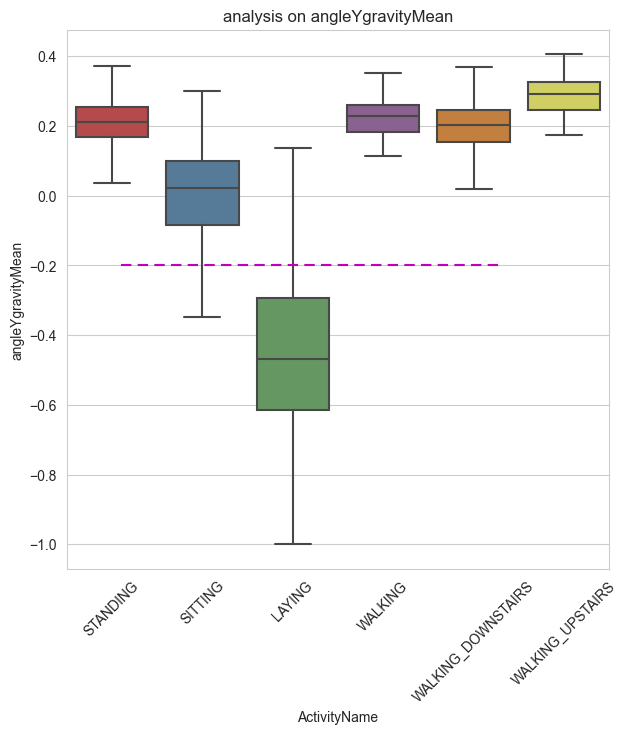

In [144]:
plt.figure(figsize=(7,7))
plt.title('analysis on angleYgravityMean')
sns.boxplot(x='ActivityName',y='angleYgravityMean',data=train,showfliers=False)
plt.axhline(y=-0.20, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.xticks(rotation=45)
plt.show()

# Apply t-sne on the data 

In [145]:
from sklearn.manifold import TSNE

In [155]:
# A function to perform TSNE with multiple perplixity value and their respective plot
def perform_tsne(X_data,Y_data,perplexities,n_iter=1000,img_name_prefix='t-sne'):
    #perform tsne
    for index, perplexity in enumerate(perplexities):
        print('\n performing tsne with perplixity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced=TSNE(verbose=2,perplexity=perplexity).fit_transform(X_data)
        print('Done')
        #prepare the data to plot
        print('printing the plot for TSNE visualisation')
        df=pd.DataFrame({'x':X_reduced[:,0],'y':X_reduced[:,1],'label':Y_data})
    
        #draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x',y='y',hue='label',fit_reg=False,height=8,palette='Set1',markers=['^','v','s','o','1','2'])
        plt.title('Perplexity isequal to {} and max iter isequal to {}'.format(perplexity,n_iter))
        plt.show()
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        # plt.show()
        print('Done')



 performing tsne with perplixity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 0.421s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 119.3258133, gradient norm = 0.0418866 (50 iterations in 1.210s)
[t-SNE] Iteration 100: error = 105.1168518, gradient norm = 0.0228138 (50 iterations in

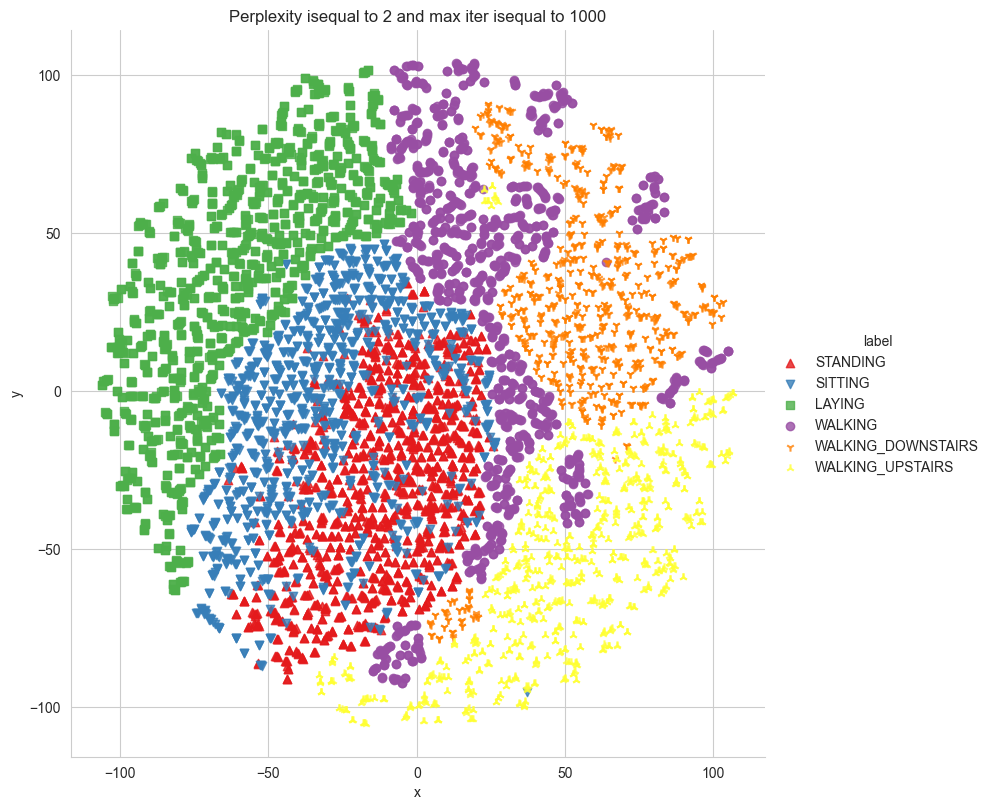

saving this plot as image in present working directory...
Done

 performing tsne with perplixity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 0.479s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.018s
[t-SNE] Iteration 50: error = 107.1611786, gradient norm = 0.0384430 (50 iterations in 1.419s)
[t-SNE] Iteration 100: 

<Figure size 640x480 with 0 Axes>

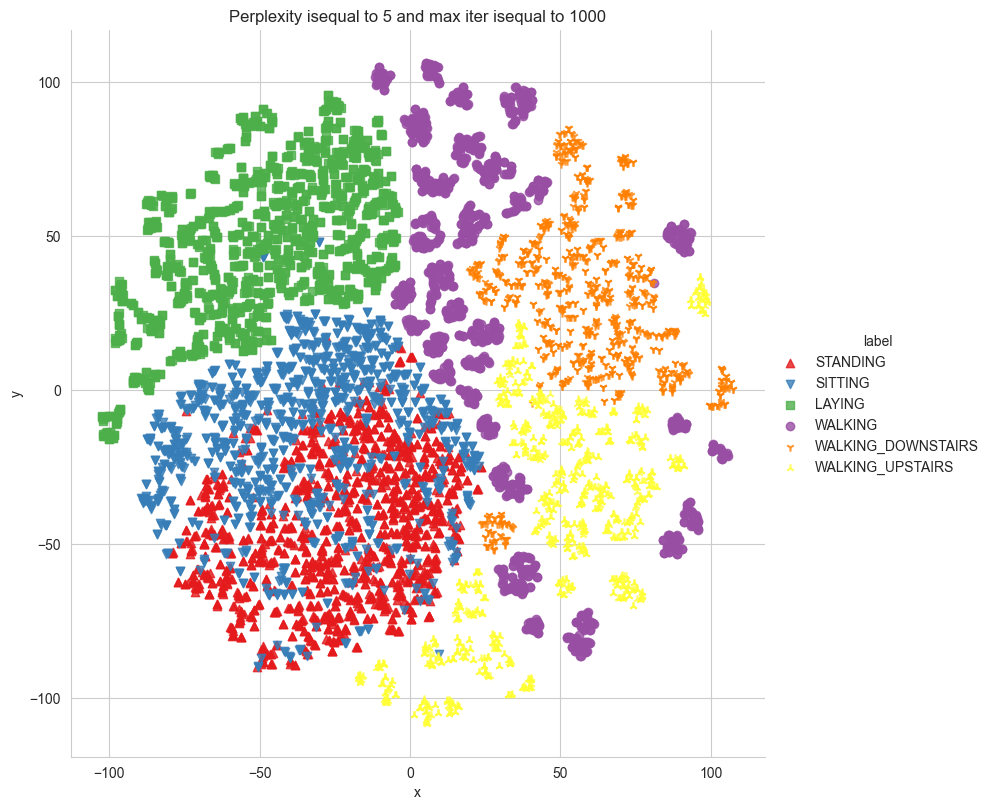

saving this plot as image in present working directory...
Done

 performing tsne with perplixity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 0.592s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.035s
[t-SNE] Iteration 50: error = 97.9077911, gradient norm = 0.0350653 (50 iterations in 1.536s)
[t-SNE] Iteration 100: 

<Figure size 640x480 with 0 Axes>

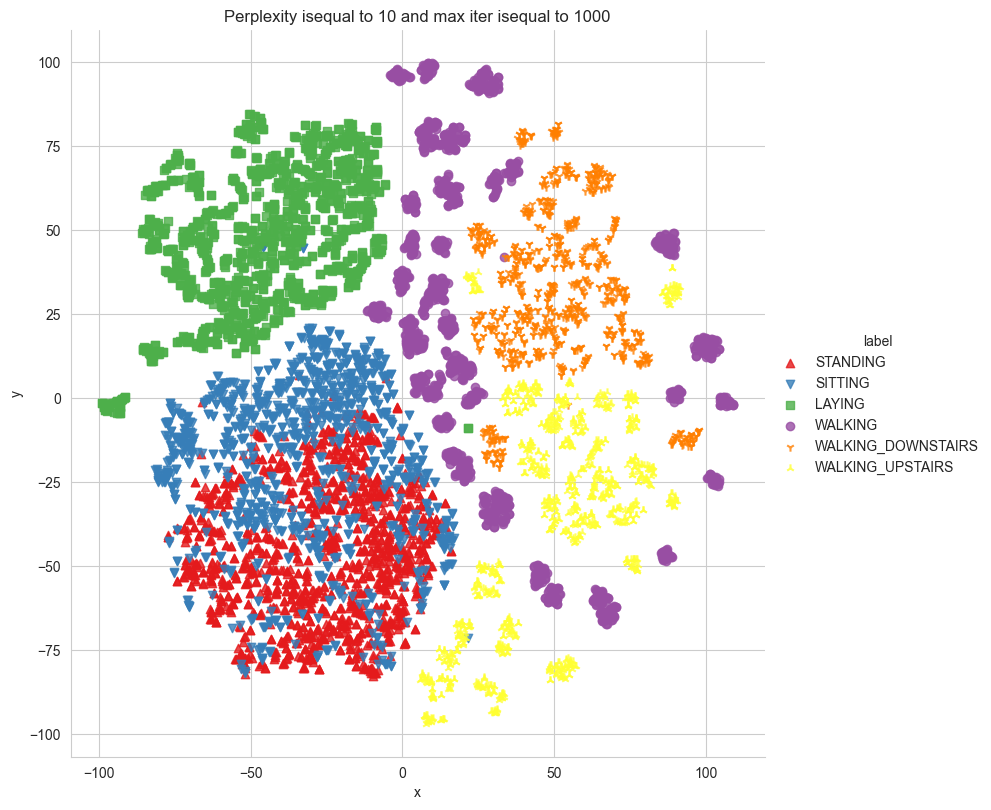

saving this plot as image in present working directory...
Done

 performing tsne with perplixity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 0.619s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.072s
[t-SNE] Iteration 50: error = 89.3005829, gradient norm = 0.0307249 (50 iterations in 1.719s)
[t-SNE] Iteration 100: 

<Figure size 640x480 with 0 Axes>

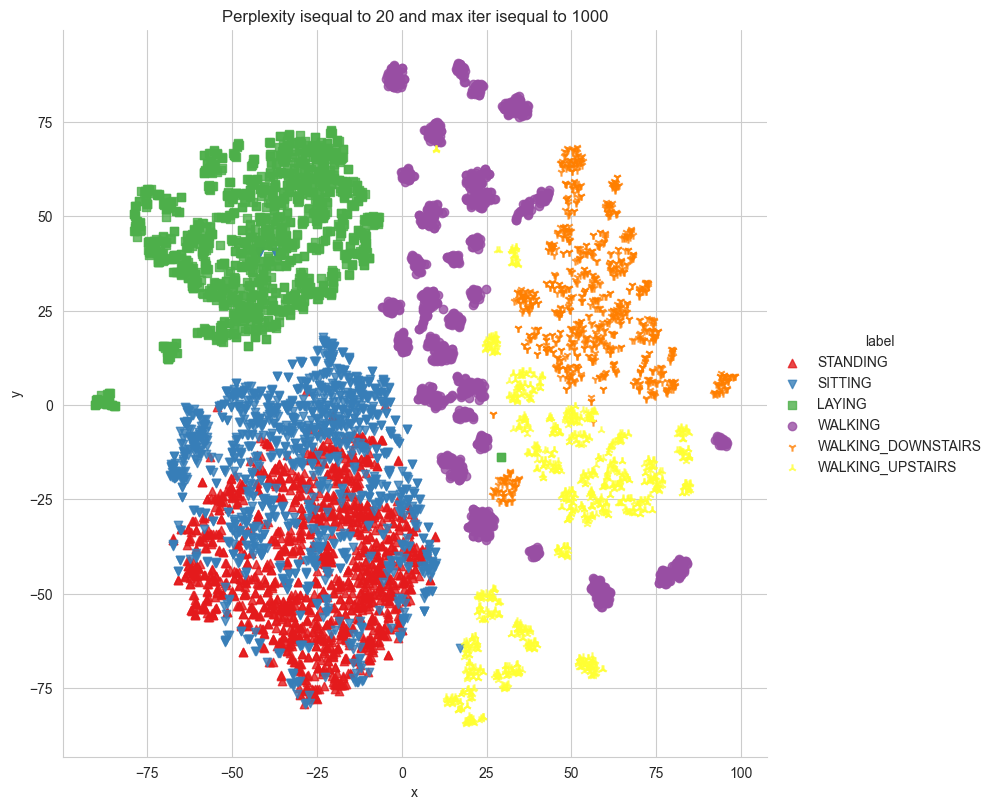

saving this plot as image in present working directory...
Done

 performing tsne with perplixity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 0.734s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.177s
[t-SNE] Iteration 50: error = 78.8777466, gradient norm = 0.0246780 (50 iterations in 2.377s)
[t-SNE] Iteration 100:

<Figure size 640x480 with 0 Axes>

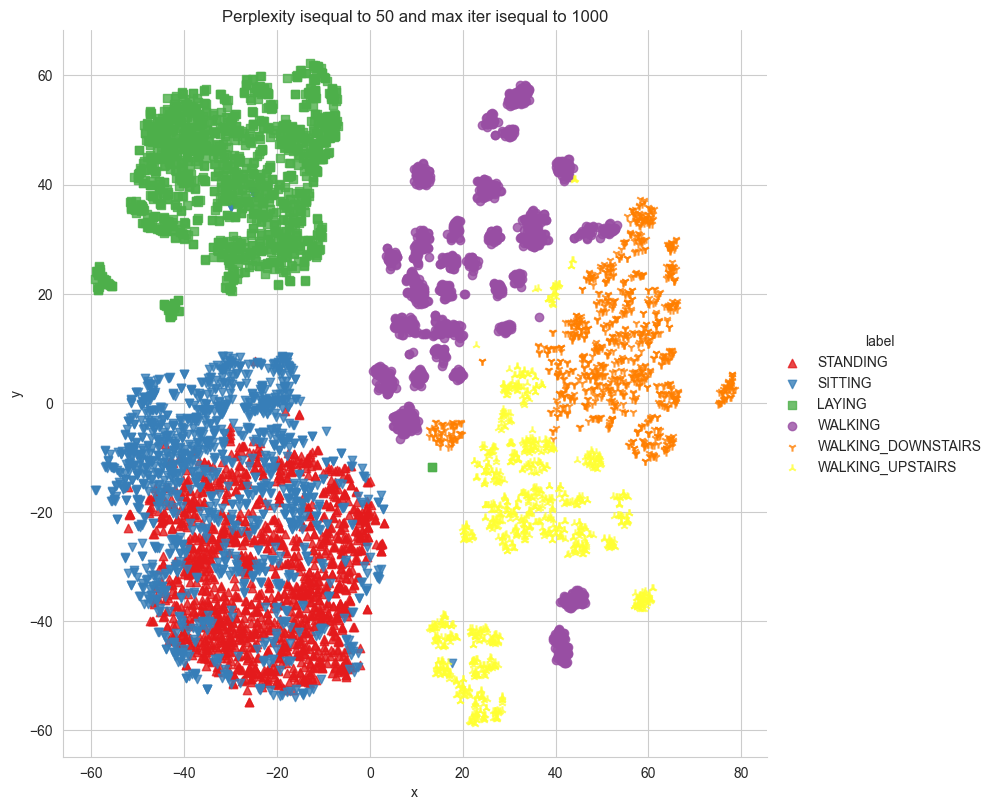

saving this plot as image in present working directory...
Done


<Figure size 640x480 with 0 Axes>

In [156]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,Y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

## conclusion
We can see from the above plots that there is a lot of overlapping between sitting ad standingmthat should be our main area of focus